# Raisin Class Prediction

**Data Set Information:**

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


**Attribute Information:**

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

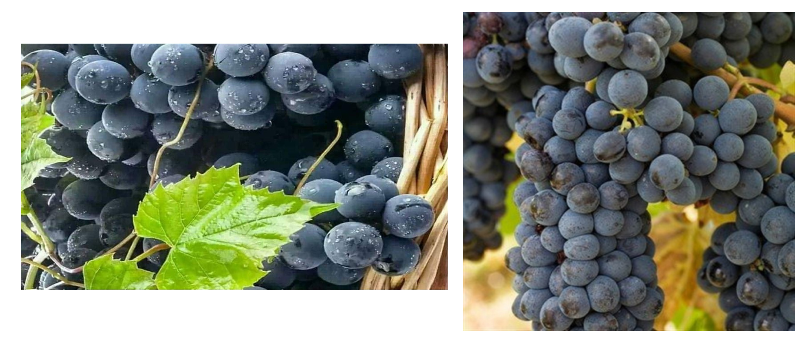


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


## Exploratory Data Analysis and Visualization

In [3]:
df.shape

(900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [6]:
df["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [9]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246,253.291,0.820,90546,0.759,1184.040
1,75166,406.691,243.032,0.802,78789,0.684,1121.786
2,90856,442.267,266.328,0.798,93717,0.638,1208.575
3,45928,286.541,208.760,0.685,47336,0.700,844.162
4,79408,352.191,290.828,0.564,81463,0.793,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077,247.839,0.817,85839,0.669,1129.072
896,87350,440.736,259.293,0.809,90899,0.636,1214.252
897,99657,431.707,298.837,0.722,106264,0.741,1292.828
898,93523,476.344,254.176,0.846,97653,0.659,1258.548


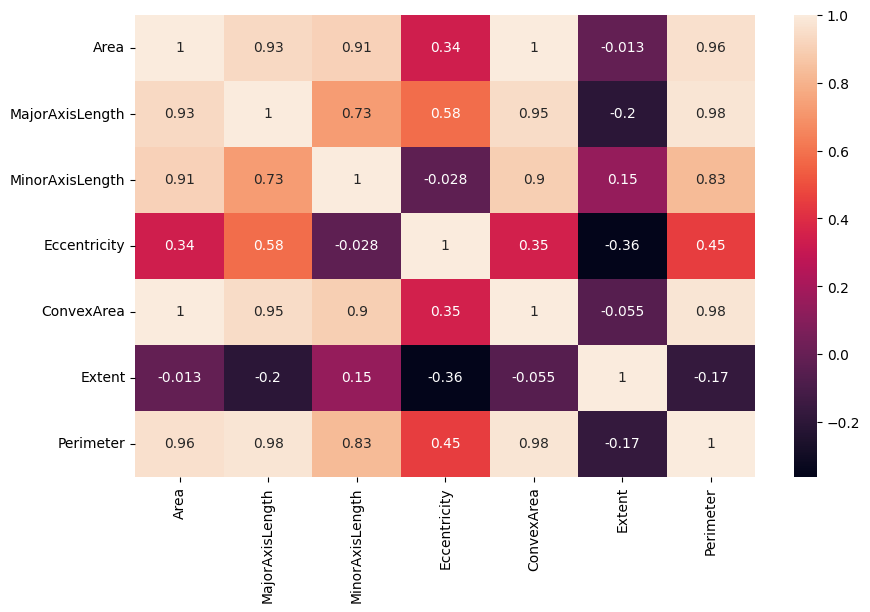

In [10]:
sns.heatmap(df_numeric.corr(), annot =True);

In [11]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

True

In [12]:
def color_red(val):

    if val > 0.90 and val <= 0.999 or val <= -0.90 and val > -0.99999:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [13]:
df_numeric.corr().style.applymap(color_red)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


In [14]:
from scipy.stats import skew

In [15]:
for column in df_numeric:
    skewness = skew(df[column])
    print(f'{column}: Skewness = {skewness}')

Area: Skewness = 1.173277753987419
MajorAxisLength: Skewness = 0.9878941292690085
MinorAxisLength: Skewness = 0.7987153311294395
Eccentricity: Skewness = -1.3252897159085628
ConvexArea: Skewness = 1.2408315755758617
Extent: Skewness = -1.1495846874562732
Perimeter: Skewness = 1.016064035889089


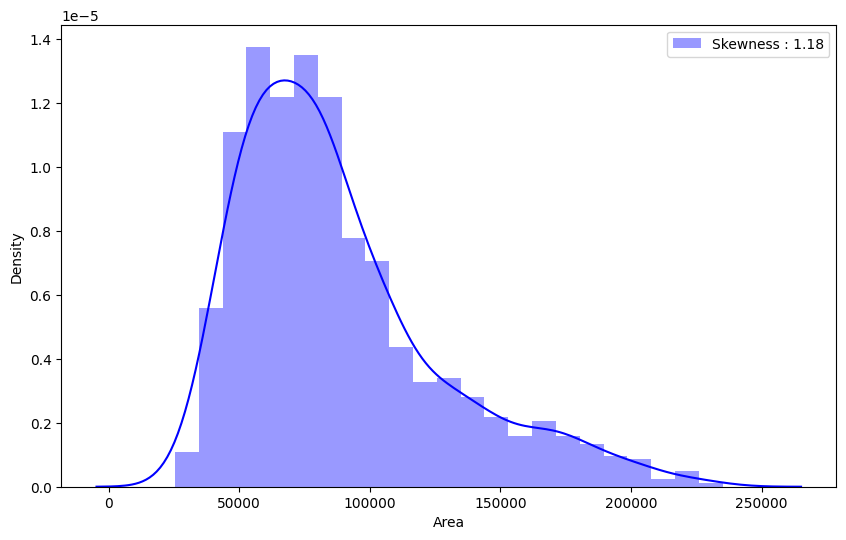

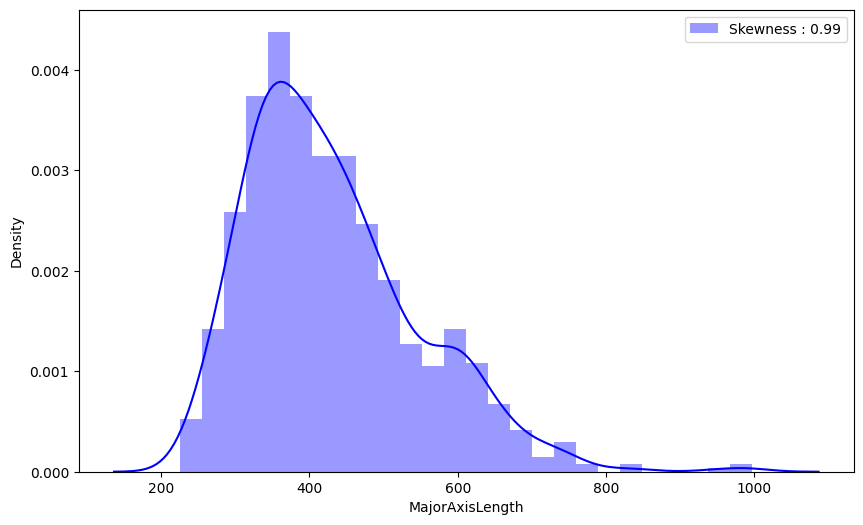

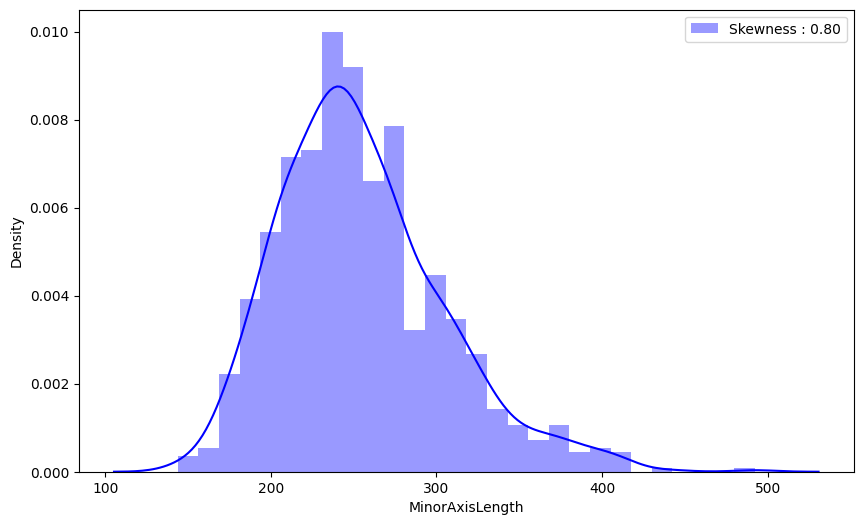

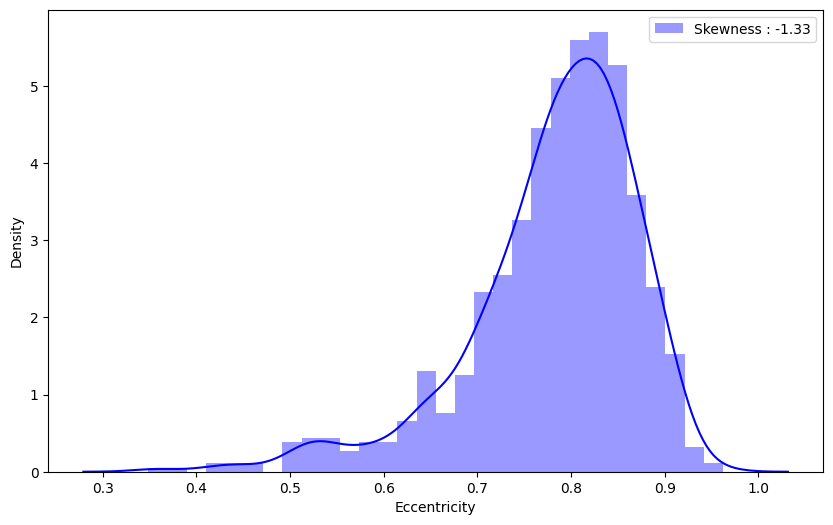

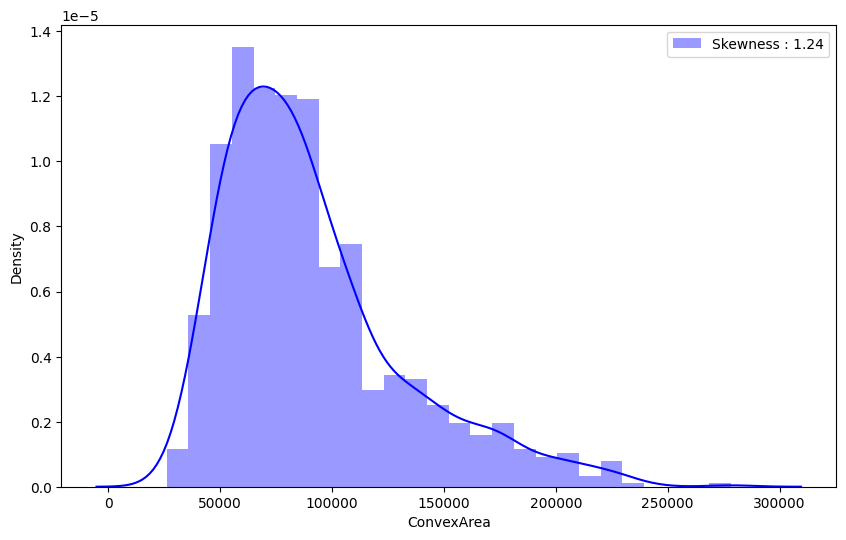

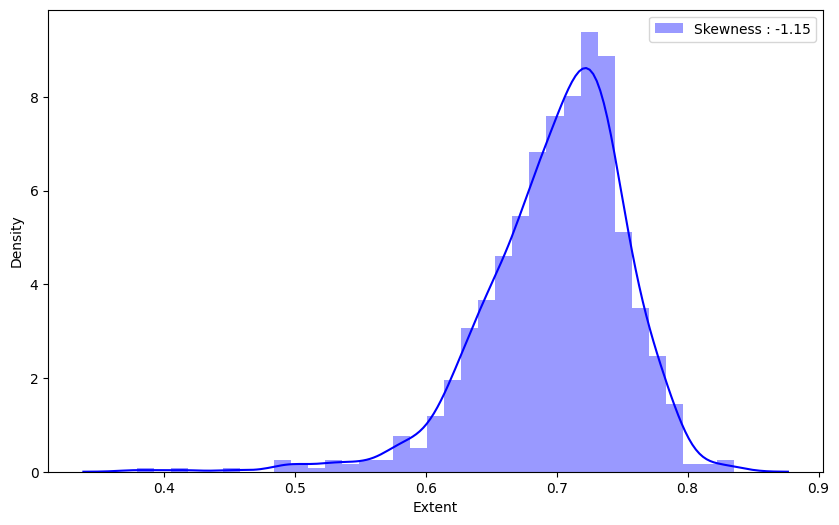

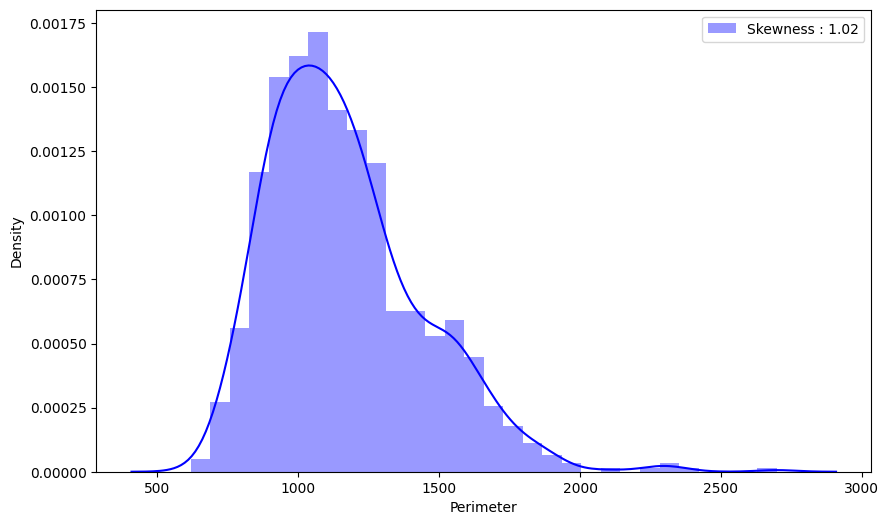

In [16]:
for j in df_numeric:
    g = sns.distplot(df[j], color= "b", label= "Skewness : %.2f"%(df[j].skew()))
    g = g.legend(loc= "best")
    plt.show()

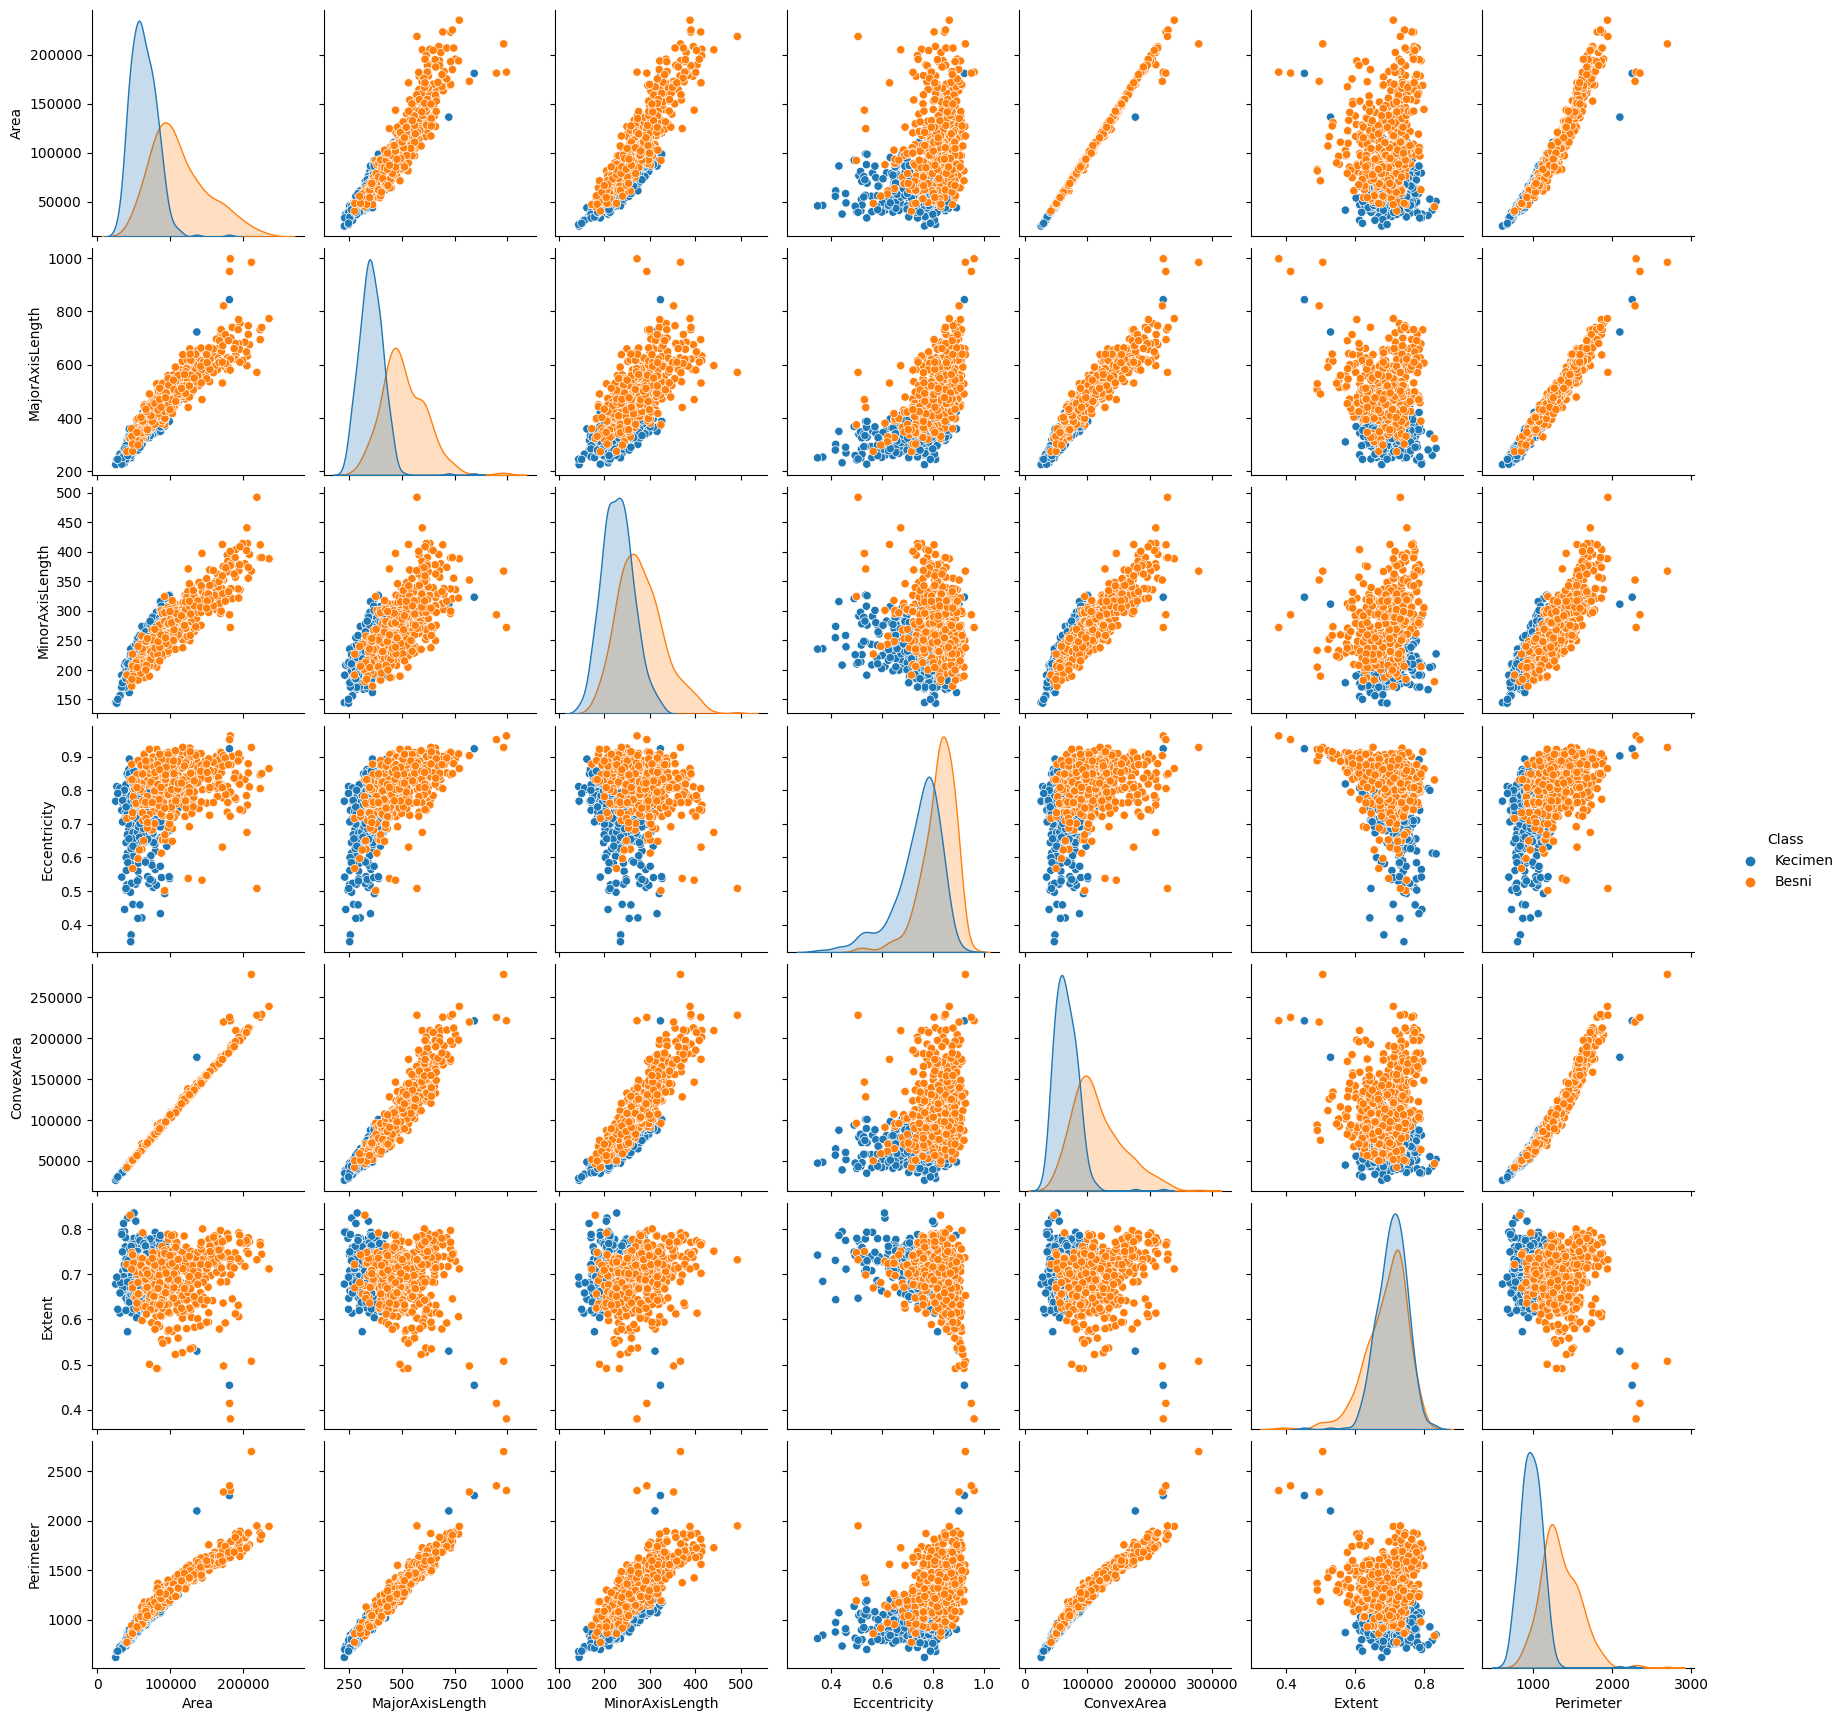

In [17]:
sns.pairplot(df,hue ="Class");

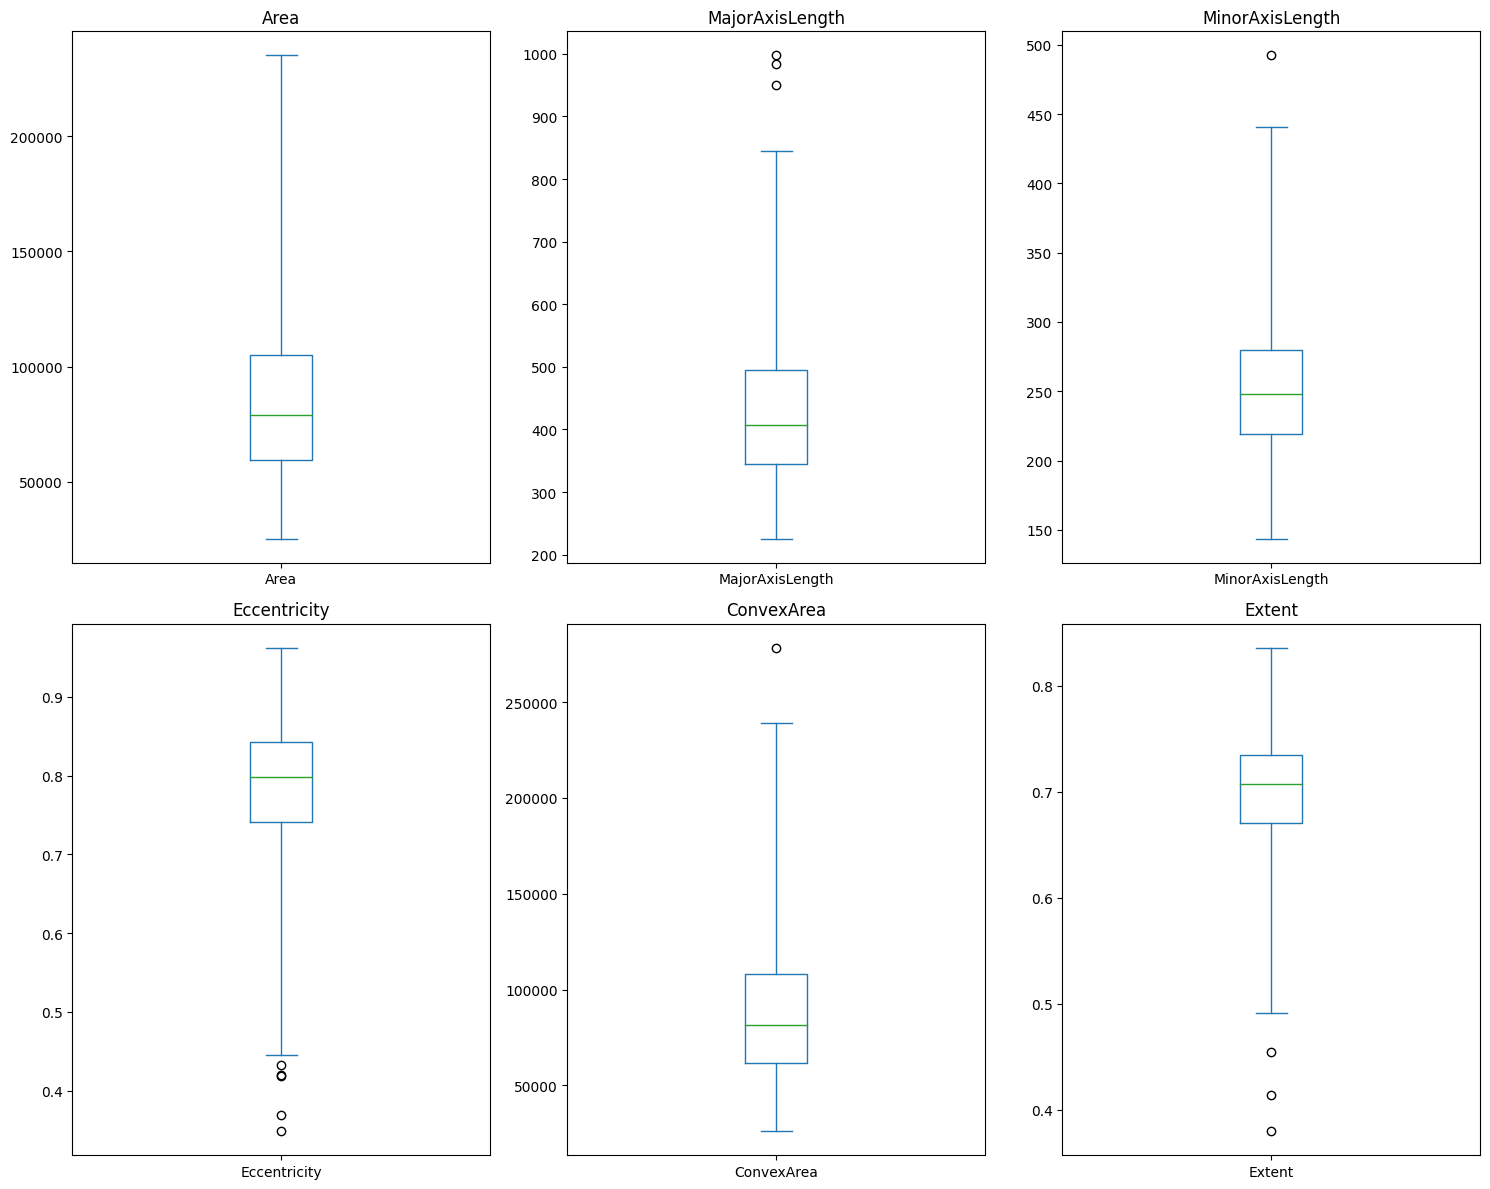

In [18]:
# Select numerical features from the DataFrame
numerical_features = df.select_dtypes(include='number').columns
num_numerical_features = len(numerical_features)

# Define the layout for the subplots
num_rows = 2
num_cols = 3

# Create a subplot layout; adjust the number of rows and columns if necessary
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
axes = axes.flatten()

# Limit the number of plots to the minimum of the layout and the number of numerical features
num_plots = min(num_numerical_features, num_rows * num_cols)

# Iterate through the numerical features and create box plots
for i in range(num_plots):
    df[numerical_features[i]].plot.box(ax=axes[i], whis=3)
    axes[i].set_title(numerical_features[i])

# Adjust the layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


### Target|Future

In [19]:
X=df.drop(["Class"], axis = 1)
y = df["Class"]

## Train | Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state = 42)

## Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

## Modelling

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_model = LogisticRegression()

In [28]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Predict

In [29]:
y_pred = log_model.predict(X_test_scaled)

In [30]:
y_pred_proba= log_model.predict_proba(X_test_scaled)

In [31]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(20)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba
498,116406,612.665,251.833,0.912,125638,0.526,1480.951,Besni,Besni,0.002
538,145693,591.180,321.431,0.839,151644,0.649,1595.364,Besni,Besni,0.003
714,85449,471.125,238.329,0.863,89794,0.585,1246.200,Besni,Besni,0.103
177,52508,297.697,226.252,0.650,53588,0.756,862.778,Kecimen,Kecimen,0.976
800,137921,598.761,297.202,0.868,142159,0.749,1510.852,Besni,Besni,0.007
537,82853,430.115,251.176,0.812,85292,0.746,1139.840,Besni,Besni,0.494
723,101618,443.493,293.384,0.750,104508,0.750,1238.627,Besni,Besni,0.341
98,48177,305.785,202.466,0.749,49877,0.678,860.548,Kecimen,Kecimen,0.954
552,204864,596.640,440.497,0.674,209457,0.751,1726.246,Besni,Besni,0.003
816,66315,363.579,234.454,0.764,68906,0.689,1015.021,Besni,Kecimen,0.807


## Model Performance

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
def eval_metric(model, X_train_s, y_train, X_test_scaled, y_test):
    y_train_pred = model.predict(X_train_scaled)
    y_pred = model.predict(X_test_scaled)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [34]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[75 15]
 [ 5 85]]
              precision    recall  f1-score   support

       Besni       0.94      0.83      0.88        90
     Kecimen       0.85      0.94      0.89        90

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180


Train_Set
[[304  56]
 [ 41 319]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       360
     Kecimen       0.85      0.89      0.87       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



<span style="color:blue">**Model Evaluation Summary**</span>

*Overall, it can be observed that the model exhibits similar performance on both the training and test datasets. The results obtained from the `Test_Set` indicate that the model can generalize well to new data and demonstrates good performance.
*However, it's important to note a slight decrease in the "recall" value for the "Besni" class compared to the training set.
*These findings suggest that the model generally works well, but there might be a need for more focus on certain classes or data samples.


### Cross Validate

In [60]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.858
test_precision_weighted   0.861
test_recall_weighted      0.858
test_f1_weighted          0.858
dtype: float64

<span style="color:blue">**Cross Validate Model Evaluation Summary**</span>

* "**Accuracy** shows how many of the overall predictions are correct, while **precision** represents the ratio of correct positive predictions in the classification process, and **recall** indicates how much of the true positives were detected.
The **F1** score is the harmonic average of precision and recall, indicating a balanced performance.
* Since all these metrics are quite high and balanced, it seems that our model is generally performing well."

### Cross Validate for Kecimen

In [39]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_kecimen = make_scorer(f1_score, average = None, labels =["Kecimen"])
precision_kecimen = make_scorer(precision_score, average = None, labels =["Kecimen"])
recall_kecimen = make_scorer(recall_score, average = None, labels =["Kecimen"])

In [40]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = {"f1_kecimen":f1_kecimen, 
                                                                   "precision_kecimen":precision_kecimen,
                                                                   "recall_kecimen":recall_kecimen}, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_kecimen          0.862
test_precision_kecimen   0.850
test_recall_kecimen      0.878
dtype: float64

<span style="color:blue">**Cross Validate Model Evaluation Summary for Kecimen.**</span>

* According to these metrics, it seems that your model demonstrates quite balanced performance in the classification task.
* A high F1 score generally indicates high precision and recall. 
* With these results, it can be said that the model exhibits strong and consistent performance overall.

### Class prediction

In [41]:
y_pred=log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba_besni"] = y_pred_proba[:,0]
test_data["pred_proba_kecimen"] = y_pred_proba[:,1]
test_data.sample(20)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred,pred_proba_besni,pred_proba_kecimen
885,54502,346.458,204.081,0.808,56464,0.636,927.283,Besni,Kecimen,0.133,0.867
159,41050,316.842,167.328,0.849,42965,0.641,846.833,Kecimen,Kecimen,0.080,0.920
226,88724,446.430,260.379,0.812,92630,0.657,1216.535,Kecimen,Besni,0.757,0.243
399,67852,353.124,247.335,0.714,69587,0.730,983.385,Kecimen,Kecimen,0.104,0.896
471,120255,471.814,326.546,0.722,123486,0.724,1322.814,Besni,Besni,0.822,0.178
322,45567,278.502,216.767,0.628,49075,0.714,854.724,Kecimen,Kecimen,0.024,0.976
493,72606,424.472,223.233,0.851,76975,0.684,1117.107,Besni,Besni,0.578,0.422
178,39941,251.848,208.468,0.561,41594,0.708,777.663,Kecimen,Kecimen,0.010,0.990
253,39439,246.764,212.635,0.507,42795,0.647,793.005,Kecimen,Kecimen,0.013,0.987
580,206720,713.473,373.643,0.852,210114,0.781,1866.091,Besni,Besni,1.000,0.000


### GridSearchCV

**GridSearchCV is used for an optimization process aimed at finding the best hyperparameters to achieve the best performance..**

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
log_model = LogisticRegression(max_iter = 5000)

**About the "max_iter"**

* The max_iter parameter specifies the maximum number of iterations the model will undergo during training.
* It controls how many iterations the model will perform during optimization. 
* As the complexity of the model or the size of the dataset increases, or when dealing with models that require higher complexity, it might be necessary to increase the number of iterations for optimization.

In [44]:
penalty =["l2", "l1"]
C = np.logspace(-1, 5, 20)
#solver = ["sag", "saga", "liblinear", "lbfgs"] "solver":solver,
param_grid = {"penalty" : penalty,
              "C" : C}

* The penalty list contains two different regularization types: "l1" and "l2". "l1" represents L1 regularization (Lasso), while "l2" represents L2 regularization (Ridge).

In [45]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv = 5)

* log_model represents the model that needs to be optimized. Typically, it involves creating an instance of a model, such as from the LogisticRegression class, and specifying customized or default parameters for that model. This model is then used in conjunction with techniques like GridSearchCV to determine the best hyperparameters that provide optimal performance.

* param_grid is a grid or list of hyperparameters. It contains different combinations of hyperparameters, such as penalty and C, that you've defined earlier.

* cv denotes the number of folds for cross-validation. In this case, cv = 5 indicates that a five-fold cross-validation strategy will be used.

In [46]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l2', 'l1']})

In [63]:
#This attribute contains the selected hyperparameter values that allow the model to achieve its best performance, 
#and it's typically used for the optimal configuration of the model.
grid_model.best_params_

{'C': 0.1, 'penalty': 'l2'}

* In this context, the expression 'C': 0.1 specifies that the value of the hyperparameter C is 0.1. This value represents the regularization strength. The statement 'penalty': 'l2' indicates that the penalty hyperparameter is set to 'l2'. The value 'l2' represents L2 regularization (Ridge).

In [64]:
# The "grid_model.best_score_" value represents the best average score obtained for a model and hyperparameter combination.
grid_model.best_score_

0.8625

In [65]:
# "Predictions made on the scaled test data."
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Besni', 'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni',
       'Kecimen', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni', 'Besni',
       'Besni', 'Besni', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Besni',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Kecimen', 'Besni', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Besni', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Kecimen', 'Besni', 'Besni', 'Kecimen',
       'Kecimen', 'Kecimen', 'Besni', 'Kecimen', 'Besni', 'Kecimen',
       'Besni', 'Besni', 'Kecimen', 'Kecimen', 'Kecimen', 'Besni',
       'Kecimen', 'Kecimen', 'Kecime

In [50]:
from sklearn.metrics import plot_confusion_matrix

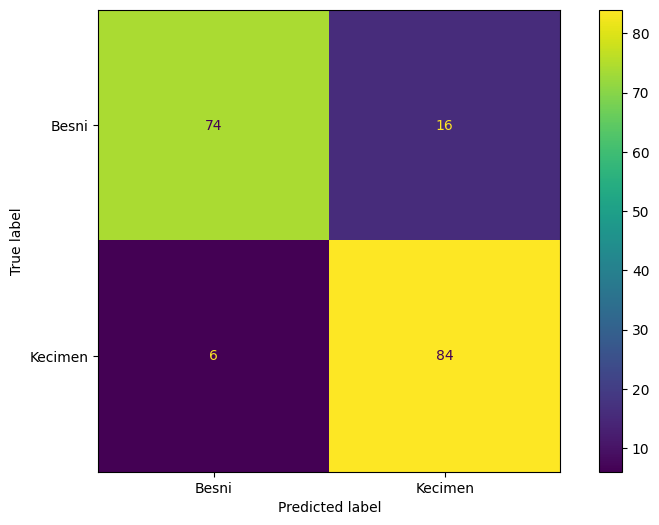

In [51]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

In [52]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[74 16]
 [ 6 84]]
              precision    recall  f1-score   support

       Besni       0.93      0.82      0.87        90
     Kecimen       0.84      0.93      0.88        90

    accuracy                           0.88       180
   macro avg       0.88      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180


Train_Set
[[304  56]
 [ 41 319]]
              precision    recall  f1-score   support

       Besni       0.88      0.84      0.86       360
     Kecimen       0.85      0.89      0.87       360

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



<span style="color:blue">**GridSearchCV Model Evaluation Summary**</span>
* These results demonstrate a balanced and high level of performance both on the test and training datasets.

For the Test Set:

* The accuracy rate (88%) is notably high and well-balanced.
Precision, recall, and F1-score values for both classes are quite close to each other and high.
Although the "Besni" class has a slightly lower recall, overall, there is a balanced performance.

Regarding the Training Set:

* Again, a high accuracy rate (87%) is achieved.
Precision, recall, and F1-score values are high and well-balanced. Similar values are obtained for both classes.
In both cases, the classification performance appears to be highly balanced and accurate. It seems that the model effectively distinguishes between classes in the dataset and generally performs well.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

The plot_roc_curve function creates the Receiver Operating Characteristic (ROC) curve for a model and calculates the area under the curve (AUC). The AUC represents the area under the ROC curve, and the closer it is to 1, the better the model's performance. If the AUC is close to 0.5, the model's performance is comparable to random guessing.

In [54]:
from sklearn.metrics import plot_roc_curve

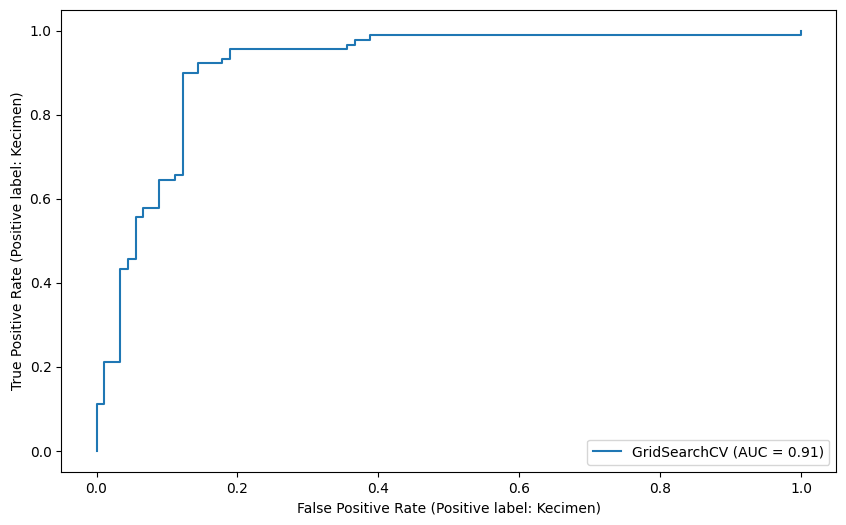

In [55]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

## Final Model and Model Deployment

In [67]:
scaler = StandardScaler().fit(X)

In [71]:
# The provided code saves the scaler object named scaler into a file named scaler_iris using the "write binary" mode (wb). 
#This action is performed to store the scaler object for later use, either within the same program or in a different program.
import pickle
pickle.dump(scaler, open("scaler_RaisinClass", "wb"))

In [69]:
X_scaled = scaler.transform(X)

In [72]:
final_model = LogisticRegression(C= 0.1 , penalty= "l2").fit(X_scaled, y)

# Conclusion 

* Results appear quite satisfactory as there's consistent performance across both the training and test sets:

**For the Test Set:**

* An accuracy rate of 88% indicates the model's success on the test data.
High and balanced Precision, Recall, and F1-score values are observed for both classes, demonstrating strong and consistent performance.
The high values of Precision, Recall, and F1-score for both classes indicate the model's ability to effectively distinguish between classes, showcasing a balanced performance.

**For the Training Set:**

* Similarly, a high accuracy rate (87%) is achieved.
High and balanced Precision, Recall, and F1-score values are maintained for both classes, showing consistent performance.
Overall, the model exhibits balanced and high performance on both the training and test datasets. These metrics indicate the model's effective differentiation between classes and its robust classification capability.

* It has been observed that for this dataset, the best model is determined to be **final_model = LogisticRegression(C=0.1, penalty="l2").fit(X_scaled, y)**.
